# DAML Sem 2 Week 6, CP12: Determing the momentum resolution for muon tracks at LHCb with NN Regression

In [51]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data inspection and variable plotting

### Exercise \#1

Data from https://cernbox.cern.ch/index.php/s/oEJHJq0fFv3KcGP

In [52]:
# Read csv data form file
file_data = pd.read_csv('mc-chic1.csv').iloc[:, 1:]

In [167]:
# Check dataframe looks as expected
file_data

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373
...,...,...,...,...,...,...,...,...,...,...
208979,0.007196,4.140301,7.805385,0.284841,-1.0,0.248430,-7.805385,0.030561,0.008948,-10.3122
208980,0.007210,3.852298,160.216980,2.341455,-1.0,6.800037,160.216980,-0.029593,0.030478,-47.0282
208981,0.004592,4.234431,32.691210,1.112678,-1.0,0.947065,-32.691210,0.012818,0.025994,-47.0282
208982,0.003816,4.122482,14.349394,2.564155,-1.0,0.464920,14.349394,-0.027161,0.017696,-47.0282


Looks like data has been read correctly.\
Values appear to make sense:
- ep is momentum fractional error so we expect to be less than 1.0.
- pseudorapitity eta should be positive but could blow up for small $\theta$ but about 3.0 to 4.0 look reasonable
- total momentum p is much larger than transverse momentum pt as predicted in the notes
- pol is $\pm$ 1 because it's the magnet polarity
- qp is muon charge times momentum and two out of every group of four are negative as expected
- tx and ty are ratios of momenta to z-component which should be small as most of momentum is in z-direction
- zV is z-component of vertex position and comes in fours for the four muons produced each time

In [54]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208984 entries, 0 to 208983
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ep      208984 non-null  float64
 1   eta     208984 non-null  float64
 2   p       208984 non-null  float64
 3   phi     208984 non-null  float64
 4   pol     208984 non-null  float64
 5   pt      208984 non-null  float64
 6   qp      208984 non-null  float64
 7   tx      208984 non-null  float64
 8   ty      208984 non-null  float64
 9   zV      208984 non-null  float64
dtypes: float64(10)
memory usage: 15.9 MB


No null values and each column has the same number of entries.

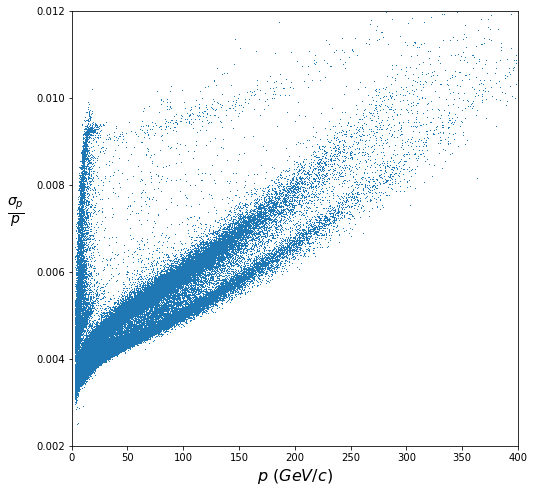

In [155]:
# Recteate Fig. 1
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(file_data['p'], file_data['ep'], ',')
ax.set_xlabel(r'$p\ (GeV/c)$', fontsize=16)
# Use same axes limits as in notes
ax.set_xlim(0, 400)
ax.set_ylabel(r'$\frac{\sigma_p}{p}$', rotation=0, fontsize=20, labelpad=20)
ax.set_ylim(0.002, 0.012)
plt.show()

We see the three different momentum resolution linear bands.

### Exercise \#2

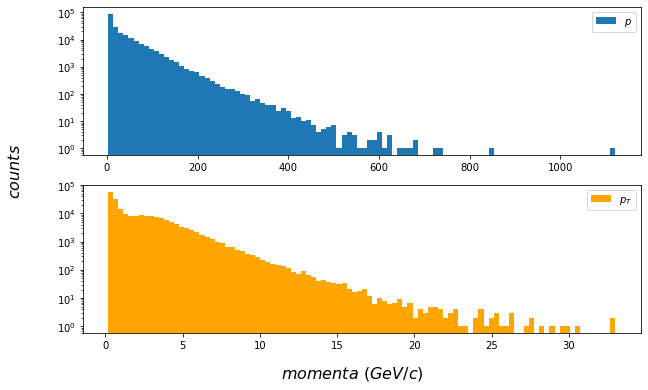

In [170]:
# Compare historgrams of p and pT
n_bins = 100
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
# Use log scale to make low count bins more visible
ax[0].hist(file_data['p'], bins=n_bins, log=True, label=r'$p$')
ax[1].hist(file_data['pt'], bins=n_bins, log=True, color='orange', label=r'$p_T$')
fig.supxlabel(r'$momenta\ (GeV/c)$', fontsize=16)
fig.supylabel(r'$counts$', fontsize=16)
ax[0].legend()
ax[1].legend()
plt.show()

From inspection, the pT distribution lies around 0-30 GeV/c while the p distribution extends well into the hundreds suggesting that, typically, $p_T \ll p_z$ ie. that the vast majority of the total momenta are in the z-direction.

In [57]:
# Create a copy of the DataFrame to be safe
new_data = file_data.copy()

In [58]:
# Add new columns pz and epz defined in notes
new_data['pz'] = np.sqrt(new_data['p']**2 - new_data['pt']**2)
new_data['epz'] = new_data['ep'] * (new_data['p'] / new_data['pz'])

In [59]:
new_data.head()

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz,epz
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,71.845851,0.005477
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.627791,0.004052
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.536851,0.003908
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.617790,0.003866
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.242050,0.004989


New columns look as expected.

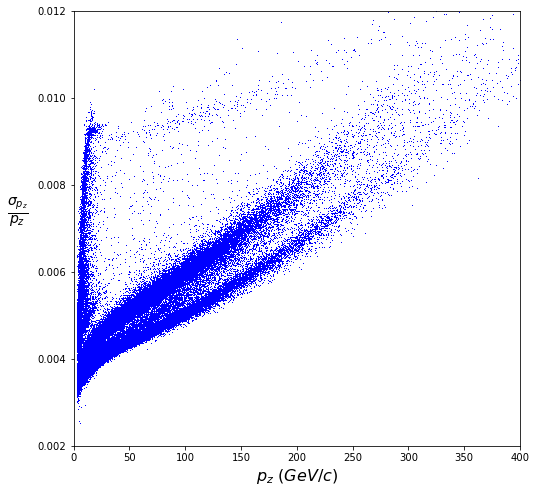

In [157]:
# Recreate Fig. 1 with pz instead of p
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(new_data['pz'], new_data['epz'], ',b')
ax.set_xlabel(r'$p_{z}\ (GeV/c)$', fontsize=16)
ax.set_xlim(0, 400)
ax.set_ylabel(r'$\frac{\sigma_{p_z}}{p_z}$', rotation=0, fontsize=20, labelpad=20)
ax.set_ylim(0.002, 0.012)
plt.show()

We see the plot is almost identical when substituting pz for p. Hence, the vast majority of the momenta are in the z-direction ie. $p_T \ll p_z$. 

## Regression with Neural Networks

In [146]:
# ML imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict

### Exercise \#3

In [83]:
# Reduced Dataframe for ML exercise
ML_data = new_data[['p', 'tx', 'ty', 'eta', 'phi', 'ep']]
# Features are first five columns
data = new_data[['p', 'tx', 'ty', 'eta', 'phi']].values
# Target is momentum resolution
target = new_data['ep'].values

In [71]:
ML_data.head()

,p,tx,ty,eta,phi,ep
0,72.079880,0.077296,0.023467,3.210803,0.294754,0.005459
1,37.638340,0.023588,-0.002100,4.436362,-0.088796,0.004050
2,18.565832,0.053102,0.017594,3.577396,0.319936,0.003901
3,8.632520,0.057089,0.012736,3.532860,0.219504,0.003859
4,43.359665,0.055445,-0.048714,3.300828,-0.720869,0.004975


In [74]:
# num of inputs = 5 (p , tx , ty , eta , phi ) , num of outputs = 1 ( ep )
num_inputs = 5; num_outputs = 1

# simple Keras model : use same # of nodes as # of inputs , single layer
num_nodes = num_inputs

In [75]:
# Compiles simple model from notes
def simple_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes, input_dim = num_inputs, kernel_initializer = 'normal' , \
    activation = 'relu'))
    # Dropout layer to try to discourage overfitting to training data
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs, kernel_initializer = 'normal'))
    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [171]:
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)

In [113]:
# Calculates mean 10-fold R^2 score with standard deviation
def R2score(N_epochs, batchSize):
    estimator = KerasRegressor(build_fn = simple_model, epochs = N_epochs, batch_size = batchSize, verbose=0)
    kfold = KFold(n_splits = 10, random_state = Answer_to_all_questions, shuffle = True)
    # data and target are 5 - column and 1 - column arrays produced with pandas.DataFrame.values
    results = cross_val_score(estimator, data, target, cv = kfold, scoring = 'r2')
    print('N_epochs = {}, batchSize = {}'.format(N_epochs, batchSize))
    print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))
    # Empty line before printing next model score
    print('')

In [115]:
# 100 epochs with batch size 5 would take very long, but batch size 1000 was okay
# 'Grid' of (number of epochs, batch size) pairs with reasonable values that won't take too long
N_epochs_list = [10, 20, 30]
batchSize_list = [200, 400, 600]
# Try each of the 9 pairs
for N_epochs in N_epochs_list:
    for batchSize in batchSize_list:

N_epochs = 10, batchSize = 200
Standardised: 0.66 ± 0.07

N_epochs = 10, batchSize = 400
Standardised: 0.58 ± 0.21

N_epochs = 10, batchSize = 600
Standardised: 0.56 ± 0.12

N_epochs = 20, batchSize = 200
Standardised: 0.65 ± 0.06

N_epochs = 20, batchSize = 400
Standardised: 0.66 ± 0.04

N_epochs = 20, batchSize = 600
Standardised: 0.67 ± 0.02

N_epochs = 30, batchSize = 200
Standardised: 0.64 ± 0.08

N_epochs = 30, batchSize = 400
Standardised: 0.66 ± 0.03

N_epochs = 30, batchSize = 600
Standardised: 0.66 ± 0.03



In [116]:
# Try a extra one with more epochs and smaller batches
R2score(40, 100)

N_epochs = 40, batchSize = 100
Standardised: 0.53 ± 0.12



A lot of the models gave similar mean $R^2$ scores. Highest mean score and lowest standard deviation was N_epochs = 20, batchSize = 600 so will use this from now on.

### Exercise \#4

In [117]:
N_epochs = 20
batchSize = 600

In [121]:
# Pipelpine method to scale features to same numerical range so model values them all equally 'important'
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = simple_model, \
epochs = N_epochs, batch_size = batchSize, verbose = 0)))
pipeline = Pipeline(estimators)

results_scaled = cross_val_score(pipeline, data, target, cv = kfold, scoring = 'r2')
print('Scaled')
print('N_epochs = {}, batchSize = {}'.format(N_epochs, batchSize))
print("Standardised: %.2f %s %.2f" % (results_scaled.mean(), u"\u00B1", results_scaled.std()))

Scaled
N_epochs = 20, batchSize = 600
Standardised: 0.68 ± 0.07


Marginal imporovement over the unstandardised data. Despite higher standard deviation, I will use the pipeline method from now on.

In [122]:
# The simple model with one extra dense layer
def denser_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes, input_dim = num_inputs, kernel_initializer = 'normal' , \
    activation = 'relu'))
    # Half the nodes of previous layer rounded down ie. 2
    model.add(Dense(num_nodes // 2, input_dim = num_inputs, kernel_initializer = 'normal' , \
    activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs, kernel_initializer = 'normal'))
    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [123]:
# Repeat evaluation for dense model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = denser_model, \
epochs = N_epochs, batch_size = batchSize, verbose = 0)))
pipeline = Pipeline(estimators)

results_scaled = cross_val_score(pipeline, data, target, cv = kfold, scoring = 'r2')
print('Scaled Denser Model')
print('N_epochs = {}, batchSize = {}'.format(N_epochs, batchSize))
print("Standardised: %.2f %s %.2f" % (results_scaled.mean(), u"\u00B1", results_scaled.std()))

Scaled Denser Model
N_epochs = 20, batchSize = 600
Standardised: 0.60 ± 0.21


Dense model has worse mean $R^2$ score and high standard deviation. Previous simple model is preferred.

In [127]:
# The simple model but with twice as many nodes in the dense layer
def wider_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(2*num_inputs, input_dim = num_inputs, kernel_initializer = 'normal' , \
    activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs, kernel_initializer = 'normal'))
    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [128]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = wider_model, \
epochs = N_epochs, batch_size = batchSize, verbose = 0)))
pipeline = Pipeline(estimators)

results_scaled = cross_val_score(pipeline, data, target, cv = kfold, scoring = 'r2')
print('Scaled Wider Model')
print('N_epochs = {}, batchSize = {}'.format(N_epochs, batchSize))
print("Standardised: %.2f %s %.2f" % (results_scaled.mean(), u"\u00B1", results_scaled.std()))

Scaled Wider Model
N_epochs = 20, batchSize = 600
Standardised: 0.74 ± 0.01


Wider model is best so far. Significantly improved mean score and low standard deviation.

In [144]:
# New model with multiple wider dense layers. Still all ReLu activated with 20% dropout
def new_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(10*num_inputs, input_dim = num_inputs, kernel_initializer = 'normal' , \
    activation = 'relu'))
    model.add(Dense(4*num_inputs, input_dim = 10*num_inputs, kernel_initializer = 'normal' , \
    activation = 'relu'))
    model.add(Dense(3*num_inputs, input_dim = 4*num_inputs, kernel_initializer = 'normal' , \
    activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs, kernel_initializer = 'normal'))
    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [145]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = new_model, \
epochs = N_epochs, batch_size = batchSize, verbose = 0)))
pipeline = Pipeline(estimators)

results_scaled = cross_val_score(pipeline, data, target, cv = kfold, scoring = 'r2')
print('Scaled New Model')
print('N_epochs = {}, batchSize = {}'.format(N_epochs, batchSize))
print("Standardised: %.2f %s %.2f" % (results_scaled.mean(), u"\u00B1", results_scaled.std()))

Scaled New Model
N_epochs = 20, batchSize = 600
Standardised: 0.83 ± 0.01


Trial-and-errored a few combinations of layers and a new, deeper and wider, model gives best score yet. 

In [147]:
# Get predicted values
predicted = cross_val_predict(pipeline, data, target, cv = kfold)

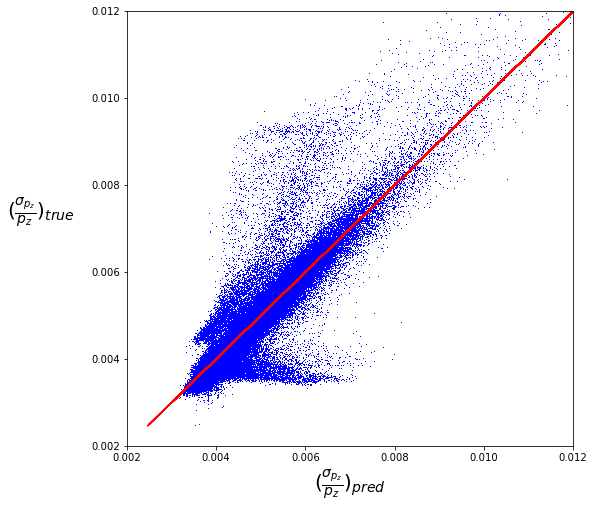

In [172]:
# Plot true momentum resolution against predicted momentum resolution
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(predicted, new_data['ep'], ',b')
# Lay on top ideal line of true = predicted
ax.plot(new_data['ep'], new_data['ep'], '-r')
ax.set_xlabel(r'$(\frac{\sigma_{p_z}}{p_z})_{pred}$', fontsize=20)
ax.set_xlim(0.002, 0.012)
ax.set_ylabel(r'$(\frac{\sigma_{p_z}}{p_z})_{true}$', rotation=0, fontsize=20, labelpad=50)
ax.set_ylim(0.002, 0.012)
plt.show()

Points are roughly focused around y=x so there is a strong correlation between the true momentum resolution and the prediction which means the model is relatively successful. However, there is a patchy cloud above the red line where the model tends to underestimate the momentum resolution and one clear branch at the low end below the red line where the model overestimates the momentum resolution.

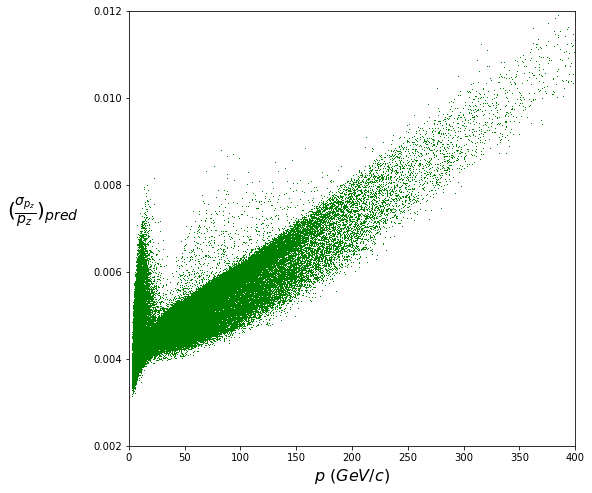

In [164]:
# Recreate Fig. 1 using the predicted momentum resolutions
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(new_data['p'], predicted, ',g')
ax.set_xlabel(r'$p\ (GeV/c)$', fontsize=16)
ax.set_xlim(0, 400)
ax.set_ylabel(r'$(\frac{\sigma_{p_z}}{p_z})_{pred}$', rotation=0, fontsize=20, labelpad=50)
ax.set_ylim(0.002, 0.012)
plt.show()

We see the predictions almost capture the three linear branches we expect to see and overall the plot is quite similar to the true Fig. 1.